<a href="https://colab.research.google.com/github/PabloJRW/TensorFlow_Developer_Certificate/blob/main/Tensorflow_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural network classification with Tensorflow

In [2]:
import pandas as pd
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
# Import Tensorflow
import tensorflow as tf
tf.__version__

'2.11.0'

## Creating data to view and fit

In [3]:
# Make 1000 examples
n_samples = 1000

# Create circles 
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [4]:
# Check the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [5]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [6]:
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


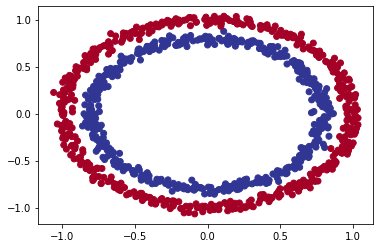

In [7]:
plt.scatter(X[:, 0],X[:, 1], c=y, cmap=plt.cm.RdYlBu)
plt.show()

## Input and output shapes

In [8]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

## Steps in modeling

The steps in modeling with TensorFlow are typically:
1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate

In [9]:
 # Set the random seed
 tf.random.set_seed(42)

 # 1. Create the model using the Sequential API
 model_1 = tf.keras.Sequential([
     tf.keras.layers.Dense(1)
 ])

 # 2. Compile the model
 model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                 optimizer=tf.keras.optimizers.SGD(),
                 metrics=["accuracy"])
 
 # 3. Fit the model
 model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 5.2114 - accuracy: 0.4770
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 4.4498 - accuracy: 0.4680
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 1.1511 - accuracy: 0.4860
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7160 - accuracy: 0.4950
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7004 - accuracy: 0.4940


In [10]:
# Let's try and improve our model by training for longer...
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Since we're working on binary classification problem and our model is getting around ~50% accuracy... it's .
So let's step things up a notch and add an extra layer.

In [11]:
 # Set the random seed
 tf.random.set_seed(42)

 # 1. Create the model using the Sequential API
 model_2 = tf.keras.Sequential([
     tf.keras.layers.Dense(1),
     tf.keras.layers.Dense(1)
 ])

 # 2. Compile the model
 model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                 optimizer=tf.keras.optimizers.SGD(),
                 metrics=["accuracy"])
 
 # 3. Fit the model
 model_2.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 6.1429 - accuracy: 0.4960
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 6.2143 - accuracy: 0.4960
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 6.5188 - accuracy: 0.5100
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

In [12]:
model_2.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

## Improving our model

Let's look into our bag of tricks to see how we can improve our model.

In [13]:
 # Set the random seed
 tf.random.set_seed(42)

 # 1. Create the model using the Sequential API
 model_3 = tf.keras.Sequential([
     tf.keras.layers.Dense(100),
     tf.keras.layers.Dense(10), 
     tf.keras.layers.Dense(1)
 ])

 # 2. Compile the model
 model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])
 
 # 3. Fit the model
 model_3.fit(X, y, epochs=100, verbose=0)

In [14]:
model_3.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6998 - accuracy: 0.5120


[0.6997783184051514, 0.5120000243186951]

To visualize our model's prediction, let's create a function

* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls)

In [15]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  """

  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X value (we're going make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # MAke predictions 
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass calssification")
    # We have to reshape our predictin to get them ready for plotting
    y_pred = np.argmax(y_pred, xis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 864us/step
doing binary classification


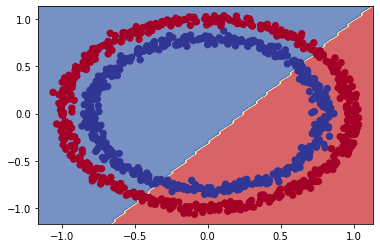

In [16]:
# Check out the predictions our miodel is making
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

In [17]:
 # Set the random seed
 tf.random.set_seed(42)

 # 1. Create the model using the Sequential API
 model_4 = tf.keras.Sequential([
     tf.keras.layers.Dense(100, activation="relu"),
     tf.keras.layers.Dense(100, activation="relu"), 
     tf.keras.layers.Dense(1, activation="sigmoid")
 ])

 # 2. Compile the model
 model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])
 
 # 3. Fit the model
 model_4.fit(X, y, epochs=100, verbose=0)

In [18]:
model_4.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 9.9258e-04 - accuracy: 1.0000


[0.0009925791528075933, 1.0]

313/313 [==============================] - 0s 872us/step
doing binary classification


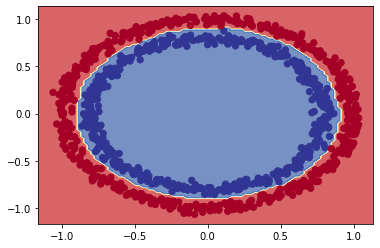

In [19]:
plot_decision_boundary(model_4, X, y)

 ## Evaluating and improving our classification

In [20]:
# Split into train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [35]:
# Let's recreate a model to fit on the training data and evaluate on the testing data
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (same as model_4)
model_5 = tf.keras.Sequential([
     tf.keras.layers.Dense(100, activation="relu"),
     tf.keras.layers.Dense(100, activation="relu"), 
     tf.keras.layers.Dense(1, activation="sigmoid")
 ])

 # 2. Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                 metrics=["accuracy"])
 
 # 3. Fit the model
model_5.fit(X_train, y_train, epochs=25, verbose=0)

In [36]:
model_5.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.0013 - accuracy: 1.0000


[0.0013040804769843817, 1.0]

In [37]:
# Evaluate the model on the test dataset
model_5.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 1.0000


[0.0017939195968210697, 1.0]

313/313 [==============================] - 0s 944us/step
doing binary classification
313/313 [==============================] - 0s 947us/step
doing binary classification


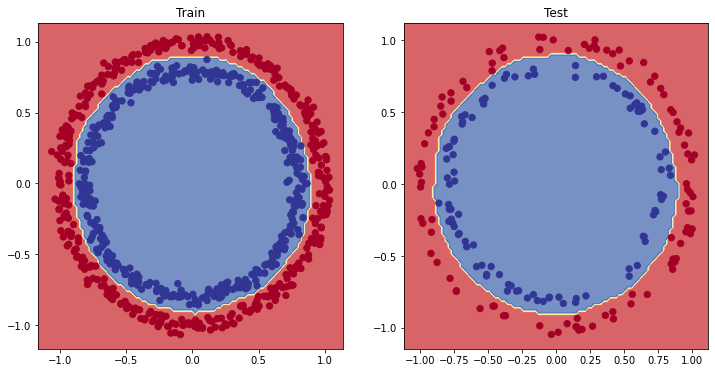

In [38]:
# Plot the decision boundaries for the training and testing sets
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_5, X=X_train, y=y_train)

plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_5, X=X_test, y=y_test)
plt.show()